In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
X = df.iloc[:,0:-1].values
Y = df.iloc[:,-1].values

##**Train-Test Split**

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X ,Y , test_size=0.20 , random_state=4)

##**Feature Scaling**

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

##**SVM Classifier**

In [18]:
from sklearn.svm import SVC
model_SVC = SVC(kernel='rbf' , random_state=4)
model_SVC.fit(X_train , Y_train)
y_pred_svm = model_SVC.decision_function(X_test)

##**Logistic Classifier**

In [19]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train,Y_train)
y_pred_logistic = model_logistic.decision_function(X_test)

##**Plot ROC and Compare AUC**

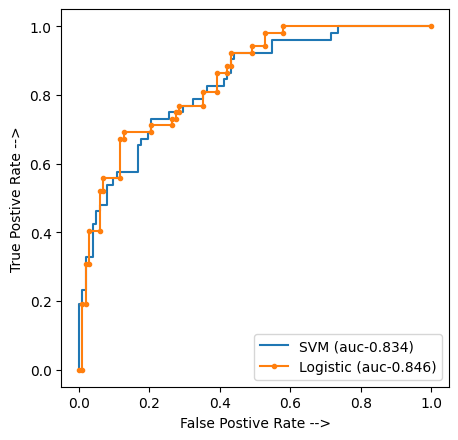

In [23]:
from sklearn.metrics import roc_curve, auc
logistic_fpr , logistic_tpr, threshold = roc_curve(Y_test , y_pred_logistic)
auc_logistic = auc(logistic_fpr , logistic_tpr)

svm_fpr , svm_tpr , threshold = roc_curve(Y_test , y_pred_svm)
auc_svm = auc(svm_fpr , svm_tpr)

plt.figure(figsize=(5,5) , dpi=100)
plt.plot(svm_fpr , svm_tpr,linestyle='-' , label='SVM (auc-%0.3f)' % auc_svm)
plt.plot(logistic_fpr , logistic_tpr , marker='.' , label='Logistic (auc-%0.3f)' % auc_logistic)
plt.xlabel('False Postive Rate -->')
plt.ylabel('True Postive Rate -->')
plt.legend()
plt.show()

###**We know that the More AUC the Better the Model is , and in our Case the better Model is Logistic model cuase it has 0.846 AUC which is larger than the SVM model**